In [3]:


# test data --- 10 --- 
x = [-1, 0, 2, 3]
y = [0, 1, -2, 2]

# 
def qZ(x, y): return ( x - 3 * y) / (2 * x ** 2 + 2 * y ** 2 + 1)

def qSumZ(z): return sum(z)

def exchangeScheme(oldX, oldY, sortedId): 
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]

    return X, Y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])

    return sortedId

def evoStep(X, Y, Z) :
    _, minId = min((value, id) for (id, value) in enumerate (Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

def evoSteps(X, Y, stepsNum = 4):
    results = []

    for i in range (4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate (X)]

        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme (X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])
    
    return X, Y, results

results = evoSteps(X=x, Y=y)

for i in range(len(results [2])):
    print(f'max_{i + 1}_step: {results [2][1][2]}')
    qualityArrZ = []

    for i in range(len(results [2])):
        qualityArrZ += results [2][i][3]

    print (f'max Z: {max (qualityArrZ)}')


max_1_step: 0.7748068924539511
max Z: 0.47058823529411764
max_2_step: 0.7748068924539511
max Z: 0.47058823529411764
max_3_step: 0.7748068924539511
max Z: 0.47058823529411764
max_4_step: 0.7748068924539511
max Z: 0.47058823529411764


Лучший выбранный маршрут: [1, 5, 2, 4, 6, 3, 1]
Длина лучшего выбранного маршрута: 175
Длины всех рассмотренных маршрутов: [168, 173, 162, 167, 175]


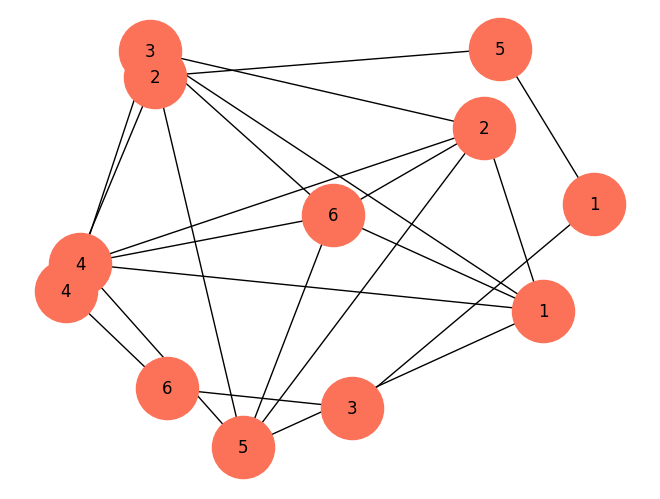

In [7]:
import networkx as nx
from math import e
# --- 8 --- 
distances = [
                (1, 2, 19),
                (1, 3, 39),
                (1, 4, 35),
                (1, 5, 26),
                (1, 6, 18),
                (2, 3, 26),
                (2, 4, 33),
                (2,5, 37),
                (2, 6, 14),
                (3, 4, 22),
                (3, 5, 41),
                (3, 6, 21),
                (4, 5, 22),
                (4, 6, 19),
                (5, 6, 24)
            ] 

V = [1, 4, 5, 2, 6, 3, 1] 
Z = [(5, 2),
    (4, 5),
    (2, 3),
    (3, 5)] 

P = [88, 54, 24, 64] 
T = 100 


# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)  

# функция изменения температуры
def reductTemp (prevT):
    nextT = 0.5 * prevT
    return nextT

graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов рёбер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


# вычисление длины ребра
def edgelength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
    
# вычисление длины маршрута
def routeLength(V, distances):
    edges = []

    for i in range(len (V) - 1):
        edges.append(edgelength(V[i], V[i + 1], distances))

    return sum(edges)

# одна перестановка 8 пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z [1] - decrement], arrV[Z[0] - decrement]
    return arrV

# перестанооки о пути
def routeReplacement (V, Z) :
    for z in Z:
        V = routeOneReplacement (V, z)
    return V

# выбор нужного пути методом отжига
def chooseRoute (distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин
    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement (V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum. append (newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        if deltaS > 0:
           p = probability(deltaS, T) # подсчёт вероятности
        # если заданная вероятность попадает в интервал от 0 до р, то новый маршрут выбирается
        if p > P[i]:
            V = newV
            sumLength = newS
        else:
            V = newV
            sumLength = newS
            
        T = reductTemp (T) # вычисление температуры

    return V, arrSum

# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len (bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute [i] and distance[1] == bestRoute[i + 1] or distance [1] == bestRoute [i] and distance [0] == bestRoute [i + 1]:
                newDistances.append(distance)
    graph = nx. Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
    # отрисовка граба с заданными вершинами
    nx. draw_kamada_kawai (graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


bestRoute, arrLength = chooseRoute (distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength (bestRoute, distances) }')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph (distances, bestRoute) # отрисовка лучшего маршрута

Лучший выбранный маршрут: [1, 5, 2, 3, 4, 6, 1]
Длина лучшего выбранного маршрута: 166
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


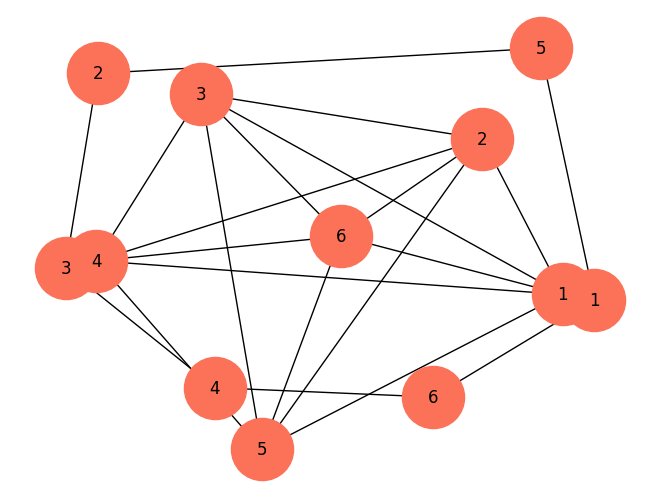

In [8]:
import networkx as nx
from math import e
distances = [ (1, 2, 20),
            (1, 3, 40),
            (1, 4, 42),
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2,4, 38),
            (2,5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)] # длины рёбер
V = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
Z = [(3, 4),
    (4, 6),
    (5, 2),
    (6, 2)] # последовательность замен вершин
P = [49, 54, 43, 54] # случайные числа, выпавшие 8 процессе счёта
Т = 100 # начальная температура

# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)  

# функция изменения температуры
def reductTemp (prevT):
    nextT = 0.5 * prevT
    return nextT

graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов рёбер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


# вычисление длины ребра
def edgelength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
    
# вычисление длины маршрута
def routeLength(V, distances):
    edges = []

    for i in range(len (V) - 1):
        edges.append(edgelength(V[i], V[i + 1], distances))

    return sum(edges)

# одна перестановка 8 пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z [1] - decrement], arrV[Z[0] - decrement]
    return arrV

# перестанооки о пути
def routeReplacement (V, Z) :
    for z in Z:
        V = routeOneReplacement (V, z)
    return V

# выбор нужного пути методом отжига
def chooseRoute (distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин
    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement (V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum. append (newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        if deltaS > 0:
           p = probability(deltaS, T) # подсчёт вероятности
        # если заданная вероятность попадает в интервал от 0 до р, то новый маршрут выбирается
        if p > P[i]:
            V = newV
            sumLength = newS
        else:
            V = newV
            sumLength = newS
            
        T = reductTemp (T) # вычисление температуры

    return V, arrSum

# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len (bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute [i] and distance[1] == bestRoute[i + 1] or distance [1] == bestRoute [i] and distance [0] == bestRoute [i + 1]:
                newDistances.append(distance)
    graph = nx. Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
    # отрисовка граба с заданными вершинами
    nx. draw_kamada_kawai (graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


bestRoute, arrLength = chooseRoute (distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength (bestRoute, distances) }')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph (distances, bestRoute) # отрисовка лучшего маршрута